# 1. Introduction

<b> Name: </b> Mohammad Javad Sharififar

<b> E-Mail: </b> Sharifi700@gmail.com

<b> Discription: </b> Thsi code is a model which trained on <i> persian-movie-info.xlsx  </i> from <i> https://github.com/mohamad-dehghani/persian-movie-info </i> .Here we want to make a recommendation system based on data of Iranian movies, seires and animations. This system is supposed to recommend the best movie that goes with user prefrences based on genre and one of favorite movies that the user select.

You can see the web application that was build based on this code by click on the link below (you should turn on your VPN if your IP is in Iran):

https://mjavadsharififar-my-codes-streamlit-jrbe09.streamlitapp.com


# 2. Set the Notebook

In [2]:
#importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#import data
data_or = pd.read_excel('C:\\Users\\MJavad\\Downloads\\persian-movie-info.xlsx')

In [490]:
data = data_or.copy() #we work on data to not lose original data in case of needings

# 3. Exploratory Data Analysis

In [491]:
data

,title,year,country,time,director,cast,genre,imdb,idmb_count,critis_rate,like,dislike,story,description,post_link,post_image_link
0,فیلم ربوده شده Stolen,1395,ایران,86,Bijan Mir Baqeri,"Hamed Javadi , مارال فرجاد , نیکی کریمی",جنایی ، درام,4.4,از 41 رای,45%,9,11,در فیلم ربوده شده داستان زندگی روج جوانی(نی...,فیلم Stolen محصول کشور ایران و در ژانر ...,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2018...
1,فیلم مالیخولیا Melancholy,1396,ایران,75,مرتضی آتش زمزم,"لاله اسکندری , لیلا اوتادی , محمدرضا هدایتی",درام ، راز آلود,3.4,از 28 رای,46%,13,15,در فیلم مالیخولیا درمورد بیماری مالیخولیا ا...,فیلم Melancholy محصول کشور ایران و در ژانر ...,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2017...
2,فیلم پرسه در حوالی من Wander About Me,1396,ایران,75,Ghazaleh Soltani,"Ali Golzadeh , Babak Ghaderi , بهناز جعفری",درام,5.7,از 31 رای,47%,9,10,NaN,NaN,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2017...
3,فیلم آپاندیس Appendix,1396,ایران,82,Hossein Namazi,"امیرعلی دانایی , آنا نعمتی , Pardis Manouchehri",درام,5.8,از 95 رای,52%,18,16,در فیلم آپاندیس در بیمارستان می گذرد و از ا...,فیلم Appendix محصول کشور ایران و در ژانر ...,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2018...
4,سریال رقص روی شیشه Raghs Rooi e Shisheh,1398,ایران,50,Mahdi Golestaneh,"امیر آقایی , بهرام رادان , فرزاد فرزین",درام,4.2,از 126 رای,57%,36,27,در سریال رقص روی شیشه یک ملودرام در سبک اجت...,سریال Raghs Rooi e Shisheh محصول کشور ایران ...,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,فیلم شب برهنه Shab-e berehne,1380,ایران,60,سعید سهیلی زاده,"علی قربان‌ زاده , Ashkan Ghassemi , Shadmehr A...",درام,5.0,از 127 رای,89%,454,54,در فیلم شب برهنه زمانی که دوستان و آشنایان ...,فیلم Shab-e berehne محصول کشور ایران و در ژا...,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2015...
312,فیلم سن پطرزبورگ Saint Petersburg,1389,ایران,50,بهروز افخمی,"بهاره رهنما , محسن تنابنده , پیمان قاسم خانی",جنایی ، درام,6.4,"از 2,882 رای",89%,860,103,در فیلم سن پطرزبورگ دو آس و پاس و دله دزد...,فیلم Saint Petersburg محصول کشور ایران و در ...,https://www.uptvs.com/saintpetersburg.html,https://www.uptvs.com/wp-contents/uploads/2015...
313,فیلم حوض نقاشی The Painting Pool,1392,ایران,92,مازیار میری,"الهام کردا , فرشته صدرعرفایی , نگار جواهریان",درام,7.4,"از 3,084 رای",90%,370,37,در فیلم حوض نقاشی زوج جوانی را که هر دو به ...,فیلم The Painting Pool محصول کشور ایران و در...,https://www.uptvs.com/download-full-movie-hd-q...,https://www.uptvs.com/wp-contents/uploads/2016...
314,فیلم ماجرای نیمروز Majaray nimroz,1396,ایران,111,محمدحسین مهدویان,"احمد مهران , هادی حجازی فر , جواد عزتی",اکشن ، تاریخی,6.8,"از 1,722 رای",90%,593,61,در فیلم ماجرای نیمروز در سال های اول انقل...,فیلم Majaray nimroz محصول کشور ایران و در ژا...,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2017...


so here we have 7 numerical data : year, time, imdb, idmb_count, critis_rate, like and dislike

4 categorical data: country, director, cast and genre

also we have 2 text columns, story and description

and more than these, we have title columns that can be used instead of index.

In [492]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            316 non-null    object 
 1   year             316 non-null    int64  
 2   country          316 non-null    object 
 3   time             315 non-null    object 
 4   director         314 non-null    object 
 5   cast             316 non-null    object 
 6   genre            316 non-null    object 
 7   imdb             316 non-null    float64
 8   idmb_count       316 non-null    object 
 9   critis_rate      316 non-null    object 
 10  like             316 non-null    int64  
 11  dislike          316 non-null    int64  
 12  story            298 non-null    object 
 13  description      300 non-null    object 
 14  post_link        316 non-null    object 
 15  post_image_link  316 non-null    object 
dtypes: float64(1), int64(3), object(12)
memory usage: 39.6+ KB


As we see it says that we dont have some null values in description and story that we should take care of them.
Also most dtypes are object, for different manipulations, we should chnage dtype also
First we go to handle numeric data:

First of all, time columns is object and should converted to int. lets have a look at this:

In [493]:
data['time'].unique()

array(['86', '75', '82', '50', '111', '95', '87', '93', '94', '79',
       '2 ساعت و 25', '81', '89', '40', '99', '105', '88', '104', '85',
       '96', '108', '90', '76', '97', '91', '100', '84', '102', '80',
       '1 ساعت و 40', '110', '1 ساعت و 33', '60', '83', '92',
       '1 ساعت و 104', '98', '103', '70', '2 ساعت و 28', '1 ساعت و 42',
       '121', '55', '115', nan, '120', '35', '1 ساعت', '77', '124', '45',
       '2 ساعت و 11', '107', '127', '1 ساعت و 50', '106', '74', '116',
       '112', '30', '3 ساعت و 17', '101', '125', '113', '119', '123',
       '114', '2 ساعت و 42'], dtype=object)

So as we see we have some incorrect values that should convert to correct one:

In [494]:
data['time'] = np.where(data['time']=='2 ساعت و 25',145,data['time'])
data['time'] = np.where(data['time']== '1 ساعت و 40',100,data['time'])
data['time'] = np.where(data['time']== '1 ساعت و 33',93,data['time'])
data['time'] = np.where(data['time']== '2 ساعت و 28',148,data['time'])
data['time'] = np.where(data['time']== '1 ساعت و 42',102,data['time'])
data['time'] = np.where(data['time']== '1 ساعت و 42',102,data['time'])
data['time'] = np.where(data['time']== '1 ساعت',60,data['time'])
data['time'] = np.where(data['time']== '2 ساعت و 11',131,data['time'])
data['time'] = np.where(data['time']== '1 ساعت و 50',110,data['time'])
data['time'] = np.where(data['time']== '3 ساعت و 17',197,data['time'])
data['time'] = np.where(data['time']== '2 ساعت و 42',162,data['time'])




we have to incorrect data, NaN and 1 ساعت و 104 which we cant find out their true value looking on datadrame, so we get the row of these values and search their name om google to find time of that movies

In [495]:
np.sort(data.year.unique())

array([1379, 1380, 1381, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390,
       1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1999,
       2009, 2011, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [496]:
data.loc[data['time'].isnull()]

,title,year,country,time,director,cast,genre,imdb,idmb_count,critis_rate,like,dislike,story,description,post_link,post_image_link
169,سریال نارگیل,1400,ایران,NaN,سیروس همتی,"آشا محرابی , بهنوش بختیاری , مهدی فقیه",خانوادگی ، کودک,6.8,از 583 رای,81%,718,167,در سریال نارگیل : پایان ماجرا ... یا .. شر...,سریال نارگیل\n محصول کشور ایران و در ...,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2021...


Now we van modify them and change dtype to integer:

In [497]:
data['time'] = np.where(data['time']== '1 ساعت و 104',104,data['time'])
data['time'] = np.where(data['time'].isnull(),44,data['time'])

In [498]:
data['time'] = data['time'].astype(int)

Check the result:

In [499]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            316 non-null    object 
 1   year             316 non-null    int64  
 2   country          316 non-null    object 
 3   time             316 non-null    int32  
 4   director         314 non-null    object 
 5   cast             316 non-null    object 
 6   genre            316 non-null    object 
 7   imdb             316 non-null    float64
 8   idmb_count       316 non-null    object 
 9   critis_rate      316 non-null    object 
 10  like             316 non-null    int64  
 11  dislike          316 non-null    int64  
 12  story            298 non-null    object 
 13  description      300 non-null    object 
 14  post_link        316 non-null    object 
 15  post_image_link  316 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(11)
memory usage: 38

In [500]:
data['time'].unique()

array([ 86,  75,  82,  50, 111,  95,  87,  93,  94,  79, 145,  81,  89,
        40,  99, 105,  88, 104,  85,  96, 108,  90,  76,  97,  91, 100,
        84, 102,  80, 110,  60,  83,  92,  98, 103,  70, 148, 121,  55,
       115,  44, 120,  35,  77, 124,  45, 131, 107, 127, 106,  74, 116,
       112,  30, 197, 101, 125, 113, 119, 123, 114, 162])

Now we have other wrong format integers named idmb_count and critis_rate, we handle them as well.
We define a finction to extract number of that and then apply it on these columns. lets have look on idbm_count:

In [501]:
np.sort(data['idmb_count'].unique())

array(['از  رای', 'از 0 رای', 'از 1,022 رای', 'از 1,026 رای',
       'از 1,072 رای', 'از 1,140 رای', 'از 1,168 رای', 'از 1,175 رای',
       'از 1,192 رای', 'از 1,257 رای', 'از 1,303 رای', 'از 1,344 رای',
       'از 1,395 رای', 'از 1,404 رای', 'از 1,405 رای', 'از 1,435 رای',
       'از 1,442 رای', 'از 1,465 رای', 'از 1,475 رای', 'از 1,486 رای',
       'از 1,538 رای', 'از 1,545 رای', 'از 1,553 رای', 'از 1,580 رای',
       'از 1,611 رای', 'از 1,630 رای', 'از 1,655 رای', 'از 1,722 رای',
       'از 1,728 رای', 'از 1,763 رای', 'از 1,981 رای', 'از 10 رای',
       'از 100 رای', 'از 101 رای', 'از 104 رای', 'از 105 رای',
       'از 108 رای', 'از 109 رای', 'از 111 رای', 'از 112 رای',
       'از 118 رای', 'از 12 رای', 'از 12,899 رای', 'از 120 رای',
       'از 121 رای', 'از 123 رای', 'از 126 رای', 'از 127 رای',
       'از 136 رای', 'از 137 رای', 'از 139 رای', 'از 142 رای',
       'از 144 رای', 'از 145 رای', 'از 146 رای', 'از 149 رای',
       'از 15 رای', 'از 150 رای', 'از 151 رای', 'از 152 رای',
  

In [502]:
def extract_num(text):
    text = text.split(' ')
    text = text[1]
    try:
        text = text.replace(',','')
    except:
        pass
    return text

In [503]:
data['idmb_count'] = data['idmb_count'].apply(lambda x: extract_num(x))

In [504]:
data['idmb_count'] = np.where(data['idmb_count']=='',np.nan,data['idmb_count'])

In [505]:
data['idmb_count'] = data['idmb_count'].astype(float) #becuase NaN is float

In [506]:
data.rename(columns = {'idmb_count':'imdb_count'}, inplace = True) #the column name was wrong also!

In [ ]:
data['imdb_count'] = data['imdb_count'].fillna(data['imdb_count'].mean()) #we have Null here

Now lets have a look on critis_rate

In [507]:
np.sort(data['critis_rate'].unique())

array(['45%', '46%', '47%', '52%', '57%', '58%', '60%', '61%', '62%',
       '63%', '64%', '65%', '66%', '67%', '68%', '69%', '70%', '71%',
       '72%', '73%', '74%', '75%', '76%', '77%', '78%', '79%', '80%',
       '81%', '82%', '83%', '84%', '85%', '86%', '87%', '88%', '89%',
       '90%', '92%'], dtype=object)

In [508]:
def percent_to_numeric(text):
    text = text.replace('%','')
    return int(text)

In [509]:
data['critis_rate'] = data['critis_rate'].apply(lambda x: percent_to_numeric(x))

Lets see if it done truely:

In [510]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            316 non-null    object 
 1   year             316 non-null    int64  
 2   country          316 non-null    object 
 3   time             316 non-null    int32  
 4   director         314 non-null    object 
 5   cast             316 non-null    object 
 6   genre            316 non-null    object 
 7   imdb             316 non-null    float64
 8   imdb_count       314 non-null    float64
 9   critis_rate      316 non-null    int64  
 10  like             316 non-null    int64  
 11  dislike          316 non-null    int64  
 12  story            298 non-null    object 
 13  description      300 non-null    object 
 14  post_link        316 non-null    object 
 15  post_image_link  316 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(9)
memory usage: 38.

Now with a clean numerical column, lets have a look on the distribution of these variables:

C:\Users\MJavad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


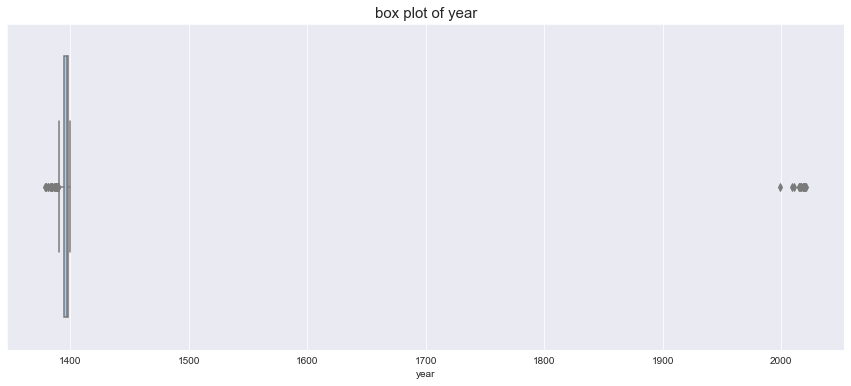

C:\Users\MJavad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


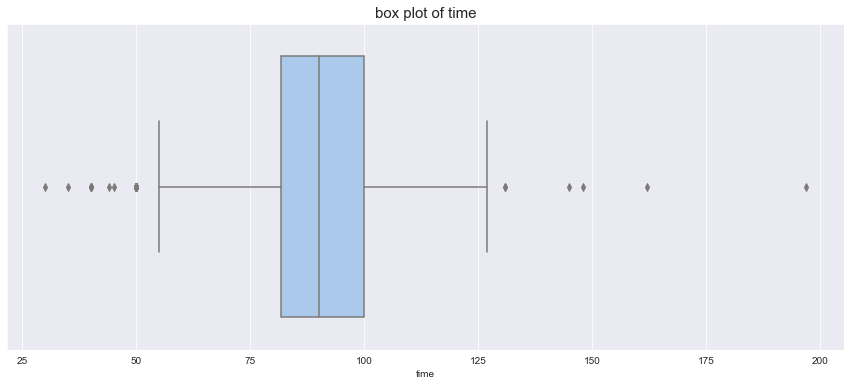

C:\Users\MJavad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


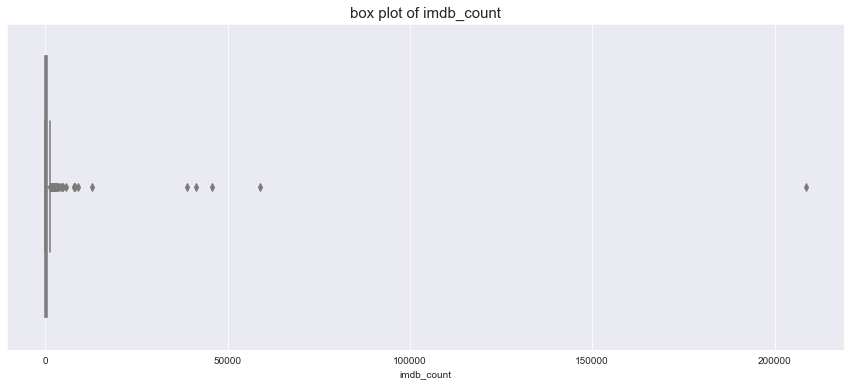

C:\Users\MJavad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


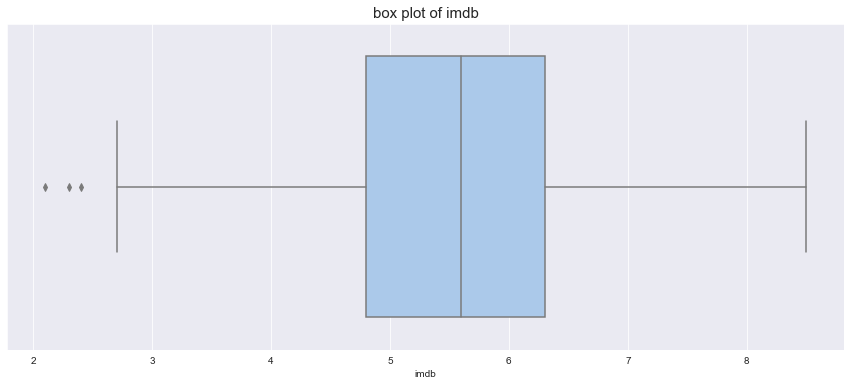

C:\Users\MJavad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


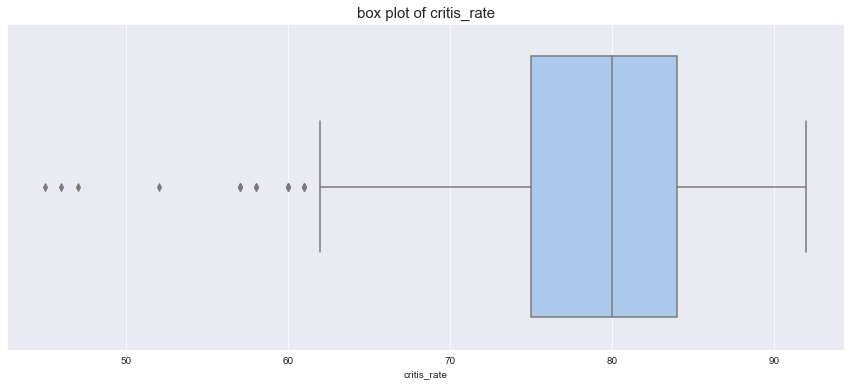

C:\Users\MJavad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


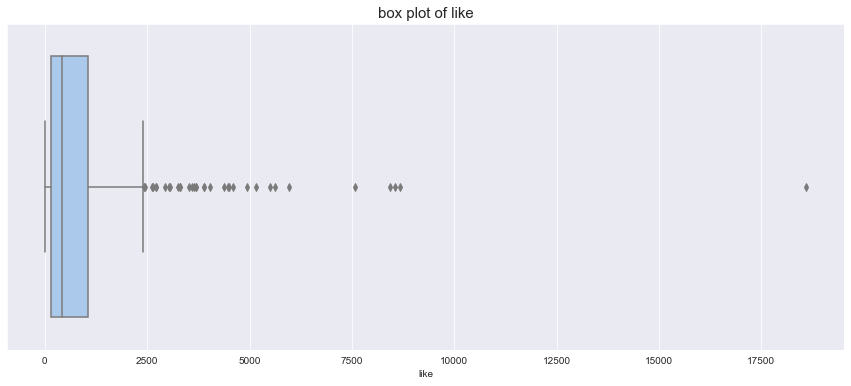

C:\Users\MJavad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


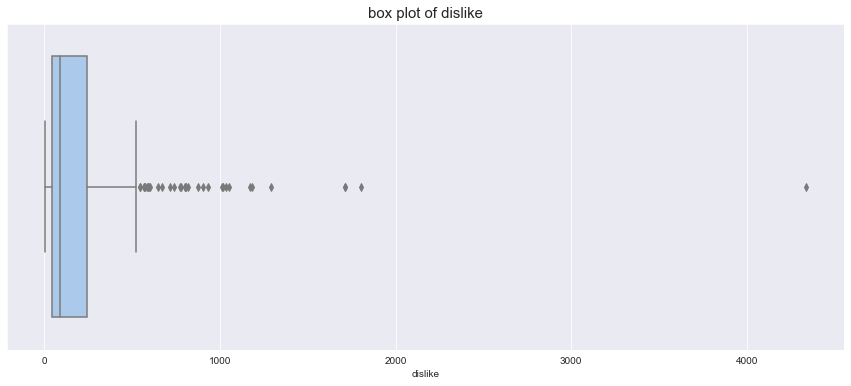

In [511]:
num_data = ['year','time','imdb_count','imdb','critis_rate','like','dislike']

sns.set_style("darkgrid")
sns.set_palette("pastel")

for i in num_data:
    plt.figure(figsize = (15,6))
    sns.boxplot(data[i])
    plt.title('box plot of {}'.format(i),size = 15)
    plt.show()

In [512]:
np.sort(data.year)

array([1379, 1380, 1380, 1381, 1381, 1383, 1384, 1384, 1384, 1385, 1385,
       1385, 1385, 1386, 1387, 1387, 1388, 1388, 1388, 1388, 1389, 1389,
       1389, 1389, 1390, 1390, 1390, 1390, 1390, 1390, 1391, 1391, 1392,
       1392, 1392, 1392, 1392, 1393, 1393, 1393, 1393, 1393, 1393, 1393,
       1393, 1393, 1394, 1394, 1394, 1394, 1394, 1394, 1394, 1394, 1394,
       1394, 1394, 1394, 1394, 1394, 1395, 1395, 1395, 1395, 1395, 1395,
       1395, 1395, 1395, 1395, 1395, 1395, 1395, 1395, 1395, 1395, 1395,
       1395, 1395, 1395, 1395, 1395, 1396, 1396, 1396, 1396, 1396, 1396,
       1396, 1396, 1396, 1396, 1396, 1396, 1396, 1396, 1396, 1396, 1396,
       1396, 1396, 1396, 1396, 1396, 1396, 1396, 1396, 1396, 1396, 1396,
       1396, 1396, 1396, 1396, 1396, 1396, 1396, 1396, 1396, 1396, 1396,
       1396, 1396, 1396, 1396, 1396, 1396, 1396, 1396, 1396, 1396, 1396,
       1396, 1396, 1396, 1396, 1396, 1396, 1396, 1397, 1397, 1397, 1397,
       1397, 1397, 1397, 1397, 1397, 1397, 1397, 13

Looking at the boxplot, we find out that year is entered in two format, Georgian and Persian, so we should handle it. more thatn this, we have absolute outlier for num of votes in imdb which affeted on like and dislike columns also. we change this value to another in raneg value to opimize the model/

First we go for year:

In [513]:
np.sort(data.year.unique())

array([1379, 1380, 1381, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390,
       1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1999,
       2009, 2011, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [514]:
persian_year_dict = {i:i for i in [year for year in list(data.year) if year<1500]}
year_dict = {1999:1378,2009:1388,2011:1390,2015:1394,2016:1395,2017:1396,2018:1397,2019:1398,2020:1399,2021:1400}
year_dict.update(persian_year_dict)
data['year']=data['year'].map(year_dict)

Do we need to remove outliers??
and then we handle like, dislike and imdb_count:

In [515]:
data.loc[data['imdb_count']>200000]

,title,year,country,time,director,cast,genre,imdb,imdb_count,critis_rate,like,dislike,story,description,post_link,post_image_link
298,فیلم جدایی نادر از سیمین A Separation 2011,1390,ایران,123,اصغر فرهادی,"علی اصغر شهبازی , بابک کریمی , کیمیا حسینی",درام,8.3,208680.0,87,619,91,در فیلم جدایی نادر از سیمین داستان زوجی است...,فیلم A Separation محصول کشور ایران و در ژان...,https://www.uptvs.com/jodaeiye-nader-az-simin-...,https://www.uptvs.com/wp-contents/uploads/2015...


In [516]:
data.loc[data['like']>17500]

,title,year,country,time,director,cast,genre,imdb,imdb_count,critis_rate,like,dislike,story,description,post_link,post_image_link
170,فیلم گشت ارشاد 3 Gasht-e ershad 3 2020,1399,ایران,115,ساعد سهیلی,"بهاره افشاری , Behnam Bani , حمید فرخ نژاد",درام ، کمدی,6.0,1580.0,81,18595,4337,در فیلم گشت ارشاد 3 : امروز 5 تیر ماه سال ...,فیلم Gasht-e ershad 3\n محصول کشور ای...,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2017...


In [517]:
data.loc[data['dislike']>4000]

,title,year,country,time,director,cast,genre,imdb,imdb_count,critis_rate,like,dislike,story,description,post_link,post_image_link
170,فیلم گشت ارشاد 3 Gasht-e ershad 3 2020,1399,ایران,115,ساعد سهیلی,"بهاره افشاری , Behnam Bani , حمید فرخ نژاد",درام ، کمدی,6.0,1580.0,81,18595,4337,در فیلم گشت ارشاد 3 : امروز 5 تیر ماه سال ...,فیلم Gasht-e ershad 3\n محصول کشور ای...,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2017...


Now we can plot the heatmap of correlation between features:

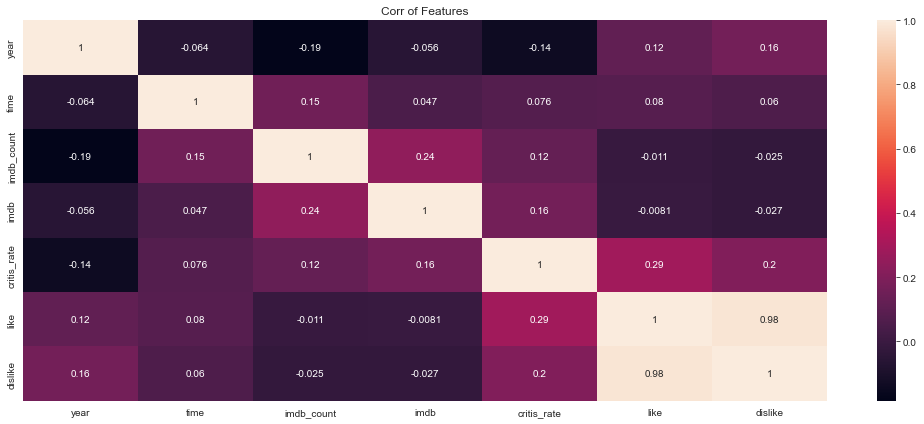

In [518]:
cor = data[num_data].corr()
plt.figure(figsize=(18,7))
heatmap = sns.heatmap(cor,annot = True)
heatmap.set(title = 'Corr of Features');

We recognize from this correlation heatmap that we have small corr between oyr features. Outstanding magnitudes are corr between like and dislike, like and critis_rate, imdb and imdb_count

So now we go to hanlde categorical data, we start by country variable:

In [519]:
data.country.unique()

array(['ایران'], dtype=object)

As you see this variable just has one unique value, so it cant helo us for our recommender system and should be removed!

Next one is director column:

In [520]:
data.director.unique()

array(['Bijan Mir Baqeri', 'مرتضی آتش زمزم', 'Ghazaleh Soltani',
       'Hossein Namazi', 'Mahdi Golestaneh', 'ابوالحسن داوودی',
       'Negar Azarbayjani', 'Rama Ghavidel', 'Hossein Shahabi',
       'Mohsen Amiryoussefi', 'Morteza Ali Abbasmirzaee',
       'Hossein Kondori', 'پرویز شهبازی', 'نسرین مقانلو', 'Reza Goran',
       'Abdolreza Kahani', 'مهدی فرد قادری', 'Vahid Amirkhani',
       'ابراهیم ابراهیمیان', 'آرش معیریان', 'Manijeh Hekmat',
       'Maryam Dousti', 'Behtash Sanaeeha', 'Pooya Badkoobeh',
       'کمال تبریزی', 'Afshin Hashemi', 'Mehdi Khosravi', 'مانی حقیقی',
       'Mitra Tabrizian', 'Adel Yaraghi', 'Mohammad Reza Khaki',
       'بهمن فرمان آرا', 'کیومرث پوراحمد', 'نیما اقلیما', 'بایرام فضلی',
       'جمشید محمودی زاده', 'خسرو معصومی', 'Vahid Zarrabinasab',
       'Mani Baghbani', 'فریدون جیرانی', 'Hamid Nematollah',
       'علیرضا امینی', 'Sabine El Gemayel', 'Mohammad Arab',
       'هاتف علیمردانی', 'رسول صدرعاملی', 'Ali Ahmadzade',
       'Amir Ahmad Ansari', 'Mas

As you see we have 2 different type format in this variable, we use Finglish library to convert finglish handwriting to official persian

In [521]:
from finglish import f2p

In [522]:
def director_persian(text):
    try: #Because we have NaN, we face error
        a = f2p(text)
    except:
        a = text
    return a

In [523]:
data['director'] = data['director'].apply(lambda x:director_persian(x))

Lets see what the NaN was and change it with true value bassed on search the director on google

In [524]:
data[data['director'].isnull()]

,title,year,country,time,director,cast,genre,imdb,imdb_count,critis_rate,like,dislike,story,description,post_link,post_image_link
97,انیمیشن حسنا کوچولو Hossna 2015,1394,ایران,86,NaN,", , فصل فصل اول , دانلود 720p\n دانلود 720p ...",انیمیشن,5.1,0.0,76,86,26,در انیمیشن حسنا کوچولو سریال حسنا کوچولو مج...,انیمیشن Hossna محصول کشور ایران و در ژانر ...,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2018...
221,انیمیشن دیرین دیرین 2016,1395,ایران,76,NaN,", , فصل فصل اول , دانلود 720p\n دانلود 720p",انیمیشن,5.2,0.0,83,103,20,NaN,انیمیشن محصول کشور ایران و در ژانر ...,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2018...


In [525]:
data.director.iloc[97] = 'حسین صفارزادگان'
data.director.iloc[221] = 'علی درخشی'

C:\Users\MJavad\AppData\Local\Temp\ipykernel_8280\2667305362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.director.iloc[97] = 'حسین صفارزادگان'
C:\Users\MJavad\AppData\Local\Temp\ipykernel_8280\2667305362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.director.iloc[221] = 'علی درخشی'


Now we chack the result:

In [526]:
np.sort(data.director.unique())

array(['آرش لاهوتی', 'آرش معیریان', 'آزیتا موگویی', 'ابدلرزا کاهانی',
       'ابراهیم ابراهیمیان', 'ابراهیم ایرجزد', 'ابراهیم حاتمی کیا',
       'ابهلقسم طلبی', 'ابوالحسن داوودی', 'احسان ابدیپور', 'احسان بیگلری',
       'احسان صادقی جهانی', 'احمد اترقچ', 'احمد معظمی', 'احمدرضا معتمدی',
       'اشکان رهگذر', 'اصغر فرهادی', 'افشین هاشمی', 'امید امین نگارشی',
       'امیر احمد انصاری', 'امیر حسین ثقفی', 'امیر دسرگر',
       'امیر شهاب رضویان', 'امیرحسین ترابی', 'اوکتای براهنی',
       'ایدا پناهنده', 'ایرج طهماسب', 'بایرام فضلی', 'برزو نیکنجد',
       'بهتاش سنیها', 'بهرام بهرامیان', 'بهرام توکلی', 'بهرنگ توفیقی',
       'بهروز افخمی', 'بهروز شیبی', 'بهمن فرمان آرا', 'بهمن گودرزی',
       'بهنام بهزادی', 'بهنوش صادقی', 'بیژن شیرمرز', 'بیژن میر باقری',
       'تهمینه میلانی', 'تورج اصلانی', 'تینا پاکروان', 'جلیل سامان',
       'جمال سید حاتمی', 'جمشید حیدری', 'جمشید محمودی زاده',
       'جهانگیر جهانگیری', 'جواد رضویان', 'جواد هاشمی', 'حامد محمدی',
       'حسن فتحی', 'حسن یکتاپناه', 'حسین 

lets have a look on frequency of directors:

In [527]:
data.groupby('director')['director'].count().sort_values(ascending = False).head(60)

director
منوچهر هادی           7
آرش معیریان           5
مهران مدیری           5
مصطفی کیایی           4
جواد هاشمی            4
فریدون جیرانی         4
سعید سهیلی زاده       4
رامبد جوان            4
اصغر فرهادی           4
حامد محمدی            3
مازیار میری           3
نرگس آبیار            3
بهمن گودرزی           3
مجید صالحی            3
هاتف علیمردانی        3
محمدحسین مهدویان      3
هومن سیدی             3
تهمینه میلانی         3
ابراهیم حاتمی کیا     3
کمال تبریزی           3
رضا میرکریمی          3
پرویز شهبازی          2
علی عطشانی            2
مسعود ده نمکی         2
ابوالحسن داوودی       2
داوود میر باقری       2
سعید روستایی          2
مهدی گلستانه          2
شهرام شاه حسینی       2
وحید امیرخانی         2
محمد حسین لطیفی       2
مهدی فرد قادری        2
خسرو معصومی           2
حمید نمتله            2
حسین شهابی            2
مهدی جعفری            2
حسین قناعت            2
ابراهیم ابراهیمیان    2
تینا پاکروان          2
سهیل بیرقی            2
بهرام توکلی           2
کیومرث 

So we just keep directors with at least 2 frequency, and change other to the value 'سایر', its because low frequency cant help up fpr our model. furthur, in one-hot, we drop 'سایر' column.

Now we go for cast column:

In [528]:
data.cast.unique()

array(['Hamed Javadi , مارال فرجاد , نیکی کریمی',
       'لاله اسکندری , لیلا اوتادی , محمدرضا هدایتی',
       'Ali Golzadeh , Babak Ghaderi , بهناز جعفری',
       'امیرعلی دانایی , آنا نعمتی , Pardis Manouchehri',
       'امیر آقایی , بهرام رادان , فرزاد فرزین',
       'بهرام رادان , مسعود رایگان , پگاه آهنگرانی',
       'امیر آقایی , پژمان بازغی , Shabnam Goudarzi',
       'علی مصفا , حمید فرخ نژاد , لادن مستوفی',
       'Bahareh Ansari , Mahsa Abiz , Mohammad Akbari',
       'اکبر عبدی , نگار جواهریان , صابر ابر',
       'Ali Alikhani , امیرعلی دانایی , بهنوش بختیاری',
       'بهار کاتوزی , باران کوثری , Mehdi Hosseinina',
       'Azade Namdari , Azarakhsh Farahani , ساعد سهیلی',
       'افسانه بایگان , بهرام افشاری , بیژن امکانیان',
       'باران کوثری , Pardis Ahmadieh , رویا افشار',
       'امین حیایی , حمید فرخ نژاد , Nitaya Chaisriyaya',
       'Ali Ebdali , آنا نعمتی , مارال فرجاد',
       'Farid Sajjadi Hosseini , هادی حجازی فر , مهناز افشار',
       'Behdokht Valian , حمیدرض

Here we need to use finglish library too..

In [529]:
def persian_actors(text):
    actors = []
    text = text.split(',')
    for i in text:
        a = f2p(i)
        actors.append(a)
    return ' , '.join(actors)

In [530]:
data['cast'] = data['cast'].apply(lambda x: perain_actors(x))

In [531]:
data.cast.unique()

array(['حامد جوادی , مارال فرجاد , نیکی کریمی',
       'لاله اسکندری , لیلا اوتادی , محمدرضا هدایتی',
       'علی گلزاده , بابک قدری , بهناز جعفری',
       'امیرعلی دانایی , آنا نعمتی , پردیس منوچهری',
       'امیر آقایی , بهرام رادان , فرزاد فرزین',
       'بهرام رادان , مسعود رایگان , پگاه آهنگرانی',
       'امیر آقایی , پژمان بازغی , شبنم گودرزی',
       'علی مصفا , حمید فرخ نژاد , لادن مستوفی',
       'بهاره انصاری , مهسا ابیض , محمد اکبری',
       'اکبر عبدی , نگار جواهریان , صابر ابر',
       'علی علیخانی , امیرعلی دانایی , بهنوش بختیاری',
       'بهار کاتوزی , باران کوثری , مهدی هسینینا',
       'آزاد نامداری , آذرخش فراهانی , ساعد سهیلی',
       'افسانه بایگان , بهرام افشاری , بیژن امکانیان',
       'باران کوثری , پردیس احمدیه , رویا افشار',
       'امین حیایی , حمید فرخ نژاد , نیتیا چیسریییا',
       'علی ابدالی , آنا نعمتی , مارال فرجاد',
       'فرید سجادی حسینی , هادی حجازی فر , مهناز افشار',
       'بهدخت والیان , حمیدرضا آذرنگ , جواد عزتی',
       'فرزاد حسنی , کامبیز دیر

Also we have 2 incorrect values here, we find them and replace them with true value by searching on google

In [532]:
data[data['cast'].str.contains("دانلود")]

,title,year,country,time,director,cast,genre,imdb,imdb_count,critis_rate,like,dislike,story,description,post_link,post_image_link
97,انیمیشن حسنا کوچولو Hossna 2015,1394,ایران,86,حسین صفارزادگان,", , فصل فصل اول , دانلود 720p\n دانلود 720p ...",انیمیشن,5.1,0.0,76,86,26,در انیمیشن حسنا کوچولو سریال حسنا کوچولو مج...,انیمیشن Hossna محصول کشور ایران و در ژانر ...,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2018...
221,انیمیشن دیرین دیرین 2016,1395,ایران,76,علی درخشی,", , فصل فصل اول , دانلود 720p\n دانلود 720p",انیمیشن,5.2,0.0,83,103,20,NaN,انیمیشن محصول کشور ایران و در ژانر ...,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2018...


In [533]:
data.cast.iloc[97] = 'سعید شیخزاده'
data.cast.iloc[221] = 'محمدرضا علیمردانی'

C:\Users\MJavad\AppData\Local\Temp\ipykernel_8280\154834952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.cast.iloc[97] = 'سعید شیخزاده'
C:\Users\MJavad\AppData\Local\Temp\ipykernel_8280\154834952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.cast.iloc[221] = 'محمدرضا علیمردانی'


now, we produce 3 columns each include name of a cast, furthur we perform one hot on these columns and merge them.

In [534]:
def cast1(text):
    a = text.split(' , ')
    return a[0]

def cast2(text):
    a = text.split(' , ')
    try:
        a = a[1]
    except:
        a = np.nan
    return a

def cast3(text):
    a = text.split(' , ')
    try:
        a = a[2]
    except:
        a = np.nan
    return a

In [535]:
data['cast_1'] = data['cast'].apply(lambda x: cast1(x))
data['cast_2'] = data['cast'].apply(lambda x: cast2(x))
data['cast_3'] = data['cast'].apply(lambda x: cast3(x))

So, it has handled too. now we go for genre column

In [536]:
data.genre.unique()

array(['جنایی  ،  درام', 'درام  ،  راز آلود', 'درام', 'خانوادگی  ،  درام',
       'درام  ،  رمانتیک', 'ترسناک  ،  درام', 'درام  ،  فانتزی',
       'تلویزیونی', 'جنگی  ،  درام', 'درام  ،  هیجان انگیز',
       'درام  ،  کمدی', 'ترسناک  ،  جنایی', 'اکشن  ،  جنایی', 'کمدی',
       'جنایی  ،  فانتزی', 'خانوادگی  ،  کمدی', 'انیمیشن  ،  خانوادگی',
       'تاریخی  ،  خانوادگی', 'انیمیشن', 'خانوادگی  ،  ماجراجویی',
       'درام  ،  موزیک', 'موزیکال', 'اکشن  ،  فانتزی', 'اجتماعی  ،  اکشن',
       'رمانتیک  ،  کمدی', 'فانتزی  ،  ماجراجویی', 'خانوادگی  ،  فانتزی',
       'اجتماعی  ،  درام', 'علمی تخیلی  ،  کودک', 'اجتماعی  ،  جنایی',
       'ماجراجویی  ،  کمدی', 'درام  ،  ورزشی', 'ماجراجویی',
       'خانوادگی  ،  کودک', 'تلویزیونی  ،  خانوادگی', 'فانتزی  ،  کمدی',
       'ماجراجویی  ،  موزیک', 'درام  ،  ماجراجویی', 'اکشن  ،  خانوادگی',
       'اکشن  ،  کمدی', 'اکشن  ،  درام', 'انیمیشن  ،  تاریخی',
       'تاریخی  ،  جنایی', 'ترسناک  ،  راز آلود', 'رمانتیک',
       'اکشن  ،  تاریخی', 'اکشن  ،  ماجر

As you see, for some movies we have 2 genre, so we divide this column into 2 columns named genre1 and 2. Then after one hot, we merge these columns as well

In [537]:
def extract_genre1(text):
    text = text.split('  ،  ')
    return text[0]

def extract_genre2(text):
    text = text.split('  ،  ')
    try:
        return text[1]
    except:
        return np.nan

In [538]:
data['genre_1'] = data['genre'].apply(lambda x:extract_genre1(x))
data['genre_2'] = data['genre'].apply(lambda x:extract_genre2(x))

Now we handled categorical data and furthur we do more. now lets go to text columns, story and description:

In [539]:
data.story.head()

0    در   فیلم ربوده شده  داستان زندگی روج جوانی(نی...
1    در   فیلم مالیخولیا  درمورد بیماری مالیخولیا ا...
2                                                  NaN
3    در   فیلم آپاندیس  در بیمارستان می گذرد و از ا...
4    در   سریال رقص روی شیشه  یک ملودرام در سبک اجت...
Name: story, dtype: object

In [540]:
data.description.head()

0    فیلم Stolen محصول کشور   ایران و در ژانر      ...
1    فیلم Melancholy محصول کشور   ایران و در ژانر  ...
2                                                  NaN
3    فیلم Appendix محصول کشور   ایران و در ژانر    ...
4    سریال Raghs Rooi e Shisheh محصول کشور   ایران ...
Name: description, dtype: object

as you see above, we can perform NLP on story, but description column actualy contains aother columns just in another format. so we can drop it.

Now let have look ontitle column, which we want to use it as index: 

In [541]:
data.title.unique()

array(['فیلم ربوده شده Stolen', 'فیلم مالیخولیا Melancholy',
       'فیلم پرسه در حوالی من Wander About Me', 'فیلم آپاندیس Appendix',
       'سریال رقص روی شیشه Raghs Rooi e Shisheh', 'فیلم زادبوم Zadboom',
       'فیلم فصل نرگس Fasl-e Narges', 'فیلم چاقی Obesity',
       'فیلم حراج The Sale',
       'فیلم آشغال های دوست داشتنی Ashghal haye Doost Dashtani',
       'فیلم انزوا Enzeva', 'فیلم شنل Shanel', 'فیلم مالاریا Malaria',
       'سریال دل Dell', 'فیلم سرکوب Sarkoob',
       'فیلم خانم یایا We Like You Miss Yaya', 'فیلم جاودانگی Javdanegi',
       'فیلم شاه کش Shah Kosh', 'فیلم پیلوت Pilot',
       'سریال رالی ایرانی Raly Irani: Iranian Rally',
       'فیلم جاده قدیم Jadeh Ghadim', 'فیلم دریاچه ماهی Daryache mahi',
       'فیلم احتمال باران اسیدی Risk of Acid Rain', 'فیلم درساژ Dressage',
       'فیلم مارموز Sly', 'فیلم گذر موقت Gozar movaghat',
       'فیلم هفت معکوس Reversed Seven', 'فیلم خوک The Pig',
       'فیلم غلام Gholam', 'فیلم امتحان نهایی Emtehan Nahaee',
       'فیلم بو

As you see above, the format of values of this clomns is that: فیلم/سریال/انیمیشن اسم فیلم به فارسی اسم فیلم به انگلیسی
so we can extract another feature of this column, which tells us that we have movie, series or animation
more than that, to have clean index, i want to just keep the persian name of this column

In [542]:
def type_of_movie(text):
    text = text.split(' ')
    if 'فیلم' in text:
        return 'فیلم'
    elif 'سریال' in text:
        return 'سریال'
    elif 'انیمیشن' in text:
        return 'انیمیشن'
    else:
        return np.nan

In [543]:
data['movie_type'] = data['title'].apply(lambda x:type_of_movie(x))

In [544]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            316 non-null    object 
 1   year             316 non-null    int64  
 2   country          316 non-null    object 
 3   time             316 non-null    int32  
 4   director         316 non-null    object 
 5   cast             316 non-null    object 
 6   genre            316 non-null    object 
 7   imdb             316 non-null    float64
 8   imdb_count       314 non-null    float64
 9   critis_rate      316 non-null    int64  
 10  like             316 non-null    int64  
 11  dislike          316 non-null    int64  
 12  story            298 non-null    object 
 13  description      300 non-null    object 
 14  post_link        316 non-null    object 
 15  post_image_link  316 non-null    object 
 16  cast_1           316 non-null    object 
 17  cast_2          

As you see there are three null values, lets chech and fill them

In [545]:
data[data['movie_type'].isnull()]

,title,year,country,time,director,cast,genre,imdb,imdb_count,critis_rate,...,story,description,post_link,post_image_link,cast_1,cast_2,cast_3,genre_1,genre_2,movie_type
99,کلاه قرمزی 97 Kolah ghermezi va pesar khale 2017,1396,ایران,92,ایرج طهماسب,"اکبر دودکار , فرخلقا هوشمند , حمید جبلی",خانوادگی ، ماجراجویی,8.1,1981.0,76,...,NaN,Kolah ghermezi va pesar khale محصول کشور ایر...,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2018...,اکبر دودکار,فرخلقا هوشمند,حمید جبلی,خانوادگی,ماجراجویی,NaN
174,همرفیق HamRefigh,1399,ایران,60,شهاب حسینی,"بهرام افشاری , هوتن شکیبا , نوید محمدزاده",تلویزیونی,6.0,204.0,81,...,در همرفیق این برنامه ترکیبی و گفت‌وگو محو...,HamRefigh محصول کشور ایران و در ژانر ...,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2021...,بهرام افشاری,هوتن شکیبا,نوید محمدزاده,تلویزیونی,NaN,NaN
193,شب های مافیا Mafia`s Night,1399,ایران,110,سعید ابوطالب,"بهاره رهنما , بهرنگ علوی , بیژن بنفشه خواه",درام ، کمدی,5.8,581.0,82,...,در شب های مافیا مافیا نوعی مسابقه و سرگرمی...,Mafia`s Night محصول کشور ایران و در ژانر ...,https://www.uptvs.com/%d8%af%d8%a7%d9%86%d9%84...,https://www.uptvs.com/wp-contents/uploads/2020...,بهاره رهنما,بهرنگ علوی,بیژن بنفشه خواه,درام,کمدی,NaN


In [546]:
data['movie_type'].iloc[99] = 'فیلم'
data['movie_type'].iloc[174] = 'برنامه ترکیبی'
data['movie_type'].iloc[193] = 'برنامه ترکیبی'

C:\Users\MJavad\AppData\Local\Temp\ipykernel_8280\2307854251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['movie_type'].iloc[99] = 'فیلم'
C:\Users\MJavad\AppData\Local\Temp\ipykernel_8280\2307854251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['movie_type'].iloc[174] = 'برنامه ترکیبی'
C:\Users\MJavad\AppData\Local\Temp\ipykernel_8280\2307854251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['movie_type

We can see the frequncy below:

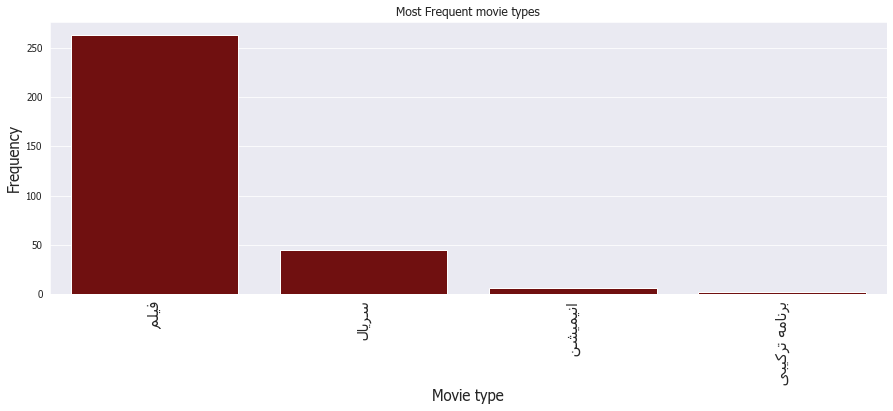

In [700]:
a = pd.DataFrame(data.groupby('movie_type')['movie_type'].count().sort_values(ascending = False))
a.rename(columns = {'movie_type':'Frequency'},inplace = True)
a.reset_index(inplace = True)

# To show the labls truely, we use these modules:
from bidi.algorithm import get_display
from arabic_reshaper import reshape
plt.rcParams['font.sans-serif'] = ['Tahoma']


fig = plt.figure(figsize = (15, 5))
sns.barplot(data = a, x = [get_display(reshape(label)) for label in a['movie_type']],y = a['Frequency'].ravel(),
            color ='maroon')
plt.xticks(rotation='vertical', size = 15)
plt.title('Most Frequent movie types')
plt.xlabel('Movie type',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show()

and lets use title as index:

In [548]:
data.set_index('title',inplace = True)

# 4. Preprocessing

## 4.1. Remove not needed columns

In [549]:
data.drop(['country','cast','genre','description','post_link','post_image_link'],axis = 1,inplace = True)

In [550]:
data

,year,time,director,imdb,imdb_count,critis_rate,like,dislike,story,cast_1,cast_2,cast_3,genre_1,genre_2,movie_type
title,,,,,,,,,,,,,,,
فیلم ربوده شده Stolen,1395,86,بیژن میر باقری,4.4,41.0,45,9,11,در فیلم ربوده شده داستان زندگی روج جوانی(نی...,حامد جوادی,مارال فرجاد,نیکی کریمی,جنایی,درام,فیلم
فیلم مالیخولیا Melancholy,1396,75,مرتضی آتش زمزم,3.4,28.0,46,13,15,در فیلم مالیخولیا درمورد بیماری مالیخولیا ا...,لاله اسکندری,لیلا اوتادی,محمدرضا هدایتی,درام,راز آلود,فیلم
فیلم پرسه در حوالی من Wander About Me,1396,75,غزاله سلطانی,5.7,31.0,47,9,10,NaN,علی گلزاده,بابک قدری,بهناز جعفری,درام,NaN,فیلم
فیلم آپاندیس Appendix,1396,82,حسین نمازی,5.8,95.0,52,18,16,در فیلم آپاندیس در بیمارستان می گذرد و از ا...,امیرعلی دانایی,آنا نعمتی,پردیس منوچهری,درام,NaN,فیلم
سریال رقص روی شیشه Raghs Rooi e Shisheh,1398,50,مهدی گلستانه,4.2,126.0,57,36,27,در سریال رقص روی شیشه یک ملودرام در سبک اجت...,امیر آقایی,بهرام رادان,فرزاد فرزین,درام,NaN,سریال
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
فیلم شب برهنه Shab-e berehne,1380,60,سعید سهیلی زاده,5.0,127.0,89,454,54,در فیلم شب برهنه زمانی که دوستان و آشنایان ...,علی قربان‌ زاده,اشکان قاسمی,شادمهر عقیلی,درام,NaN,فیلم
فیلم سن پطرزبورگ Saint Petersburg,1389,50,بهروز افخمی,6.4,2882.0,89,860,103,در فیلم سن پطرزبورگ دو آس و پاس و دله دزد...,بهاره رهنما,محسن تنابنده,پیمان قاسم خانی,جنایی,درام,فیلم
فیلم حوض نقاشی The Painting Pool,1392,92,مازیار میری,7.4,3084.0,90,370,37,در فیلم حوض نقاشی زوج جوانی را که هر دو به ...,الهام کردا,فرشته صدرعرفایی,نگار جواهریان,درام,NaN,فیلم


## 4.2 Handling Categorical Data 

### Cast

In previous section, we made a column for each cast. Now we want to perform one hot on them and integrate them

In [675]:
cast1 = pd.get_dummies(data['cast_1']) #One hot of each column
cast2 = pd.get_dummies(data['cast_2'])
cast3 = pd.get_dummies(data['cast_3'])

In [676]:
#unique values of each column
a = set(cast1.columns)
b = set(cast2.columns)
c = set(cast3.columns)

We now that if an actor just appear in just 1 movie, cant help us to build our system. so we are looking for actors who at least attended in 2 movies. To find these actors, we should take care of:

1. actors whom are at least in 2 sets (from a,b and c)

2. actors whom have more than 1 frequency in cast1, cast2 or cast 3

So first, we find actors whom were in b and c, then we find actors with frequency>1 in cast 3 and we join these list together. after that, we merge these actors in cast 3 with cast 2.

In [677]:
cast2_3 = list(b.intersection(c))
cast3_more_than_1 = list(cast3.loc[:, cast3.sum(axis=0) > 1].columns)
cast3join2 = list(set(cast2_3+cast3_more_than_1)) #avoid duplicate values

In [678]:
cast2_copy = cast2.copy() #to not lose main data

In [679]:
for actor in cast3join2:
    movies = list(cast3[cast3[actor]==1].index)
    for movie in movies:
        try:
            cast2_copy[actor]=np.where(cast2_copy.index==movie,1,cast2_copy[actor])
        except:
            cast2_copy[actor]=np.where(cast2_copy.index==movie,1,0)

Upthere, we added data of cast3 into cast 2. now we do the same for cast 2 and 1

In [680]:
b_copy = set(cast2_copy.columns)
cast1_2 = list(a.intersection(b_copy))
cast2_more_than_1 = list(cast2_copy.loc[:, cast2_copy.sum(axis=0) > 1].columns)
cast2join1 = list(set(cast1_2+cast2_more_than_1))

In [681]:
cast1_copy = cast1.copy()

In [682]:
for actor in cast2join1:
    movies = list(cast2_copy[cast2_copy[actor]==1].index)
    for movie in movies:
        try:
            cast1_copy[actor]=np.where(cast1_copy.index==movie,1,cast1_copy[actor])
        except:
            cast1_copy[actor]=np.where(cast1_copy.index==movie,1,0)

C:\Users\MJavad\AppData\Local\Temp\ipykernel_8280\2602688101.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cast1_copy[actor]=np.where(cast1_copy.index==movie,1,0)
C:\Users\MJavad\AppData\Local\Temp\ipykernel_8280\2602688101.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cast1_copy[actor]=np.where(cast1_copy.index==movie,1,0)
C:\Users\MJavad\AppData\Local\Temp\ipykernel_8280\2602688101.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

Now, we have merged cast3 to cast2 and cast2 to cast1. but maybe we have common actors in cast3 and cast1!. So we should mereg cast 3 and cast1 too.

In [683]:
cast1_3 = list(a.intersection(c))

In [685]:
for actor in cast1_3:
    movies = list(cast3[cast3[actor]==1].index)
    for movie in movies:
        cast1_copy[actor]=np.where(cast1_copy.index==movie,1,cast1_copy[actor])

At last, maybe we have some actors in cast1 with frequency ==1, and we drop them all!

In [686]:
cast_final = cast1_copy.loc[:, cast1_copy.sum(axis=0) > 1]

Here is what we get:

In [906]:
cast_final

,آتیلا پسیانی,آرمان درویش,آزاده صمدی,آشا محرابی,آنا نعمتی,آناهیتا افشار,آناهیتا درگاهی,آناهیتا همتی,احسان امانی,احمد مهران,...,محمدرضا فروتن,مریم امیرجلالی,گیتی قاسمی,نیوشا ضیغمی,حمید لولایی,پگاه آهنگرانی,سحر دولتشاهی,محسن تنابنده,همایون ارشادی,رضا بهبودی
title,,,,,,,,,,,,,,,,,,,,,
فیلم ربوده شده Stolen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
فیلم مالیخولیا Melancholy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
فیلم پرسه در حوالی من Wander About Me,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
فیلم آپاندیس Appendix,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
سریال رقص روی شیشه Raghs Rooi e Shisheh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
فیلم شب برهنه Shab-e berehne,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
فیلم سن پطرزبورگ Saint Petersburg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
فیلم حوض نقاشی The Painting Pool,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we can also see the most frequent actors in these movies!

In [707]:
cast_freq = pd.DataFrame(pd.Series({i:cast_final[i].sum() for i in list(cast_final.columns)}),columns = ['Frequency']).sort_values(by = 'Frequency',ascending = False)

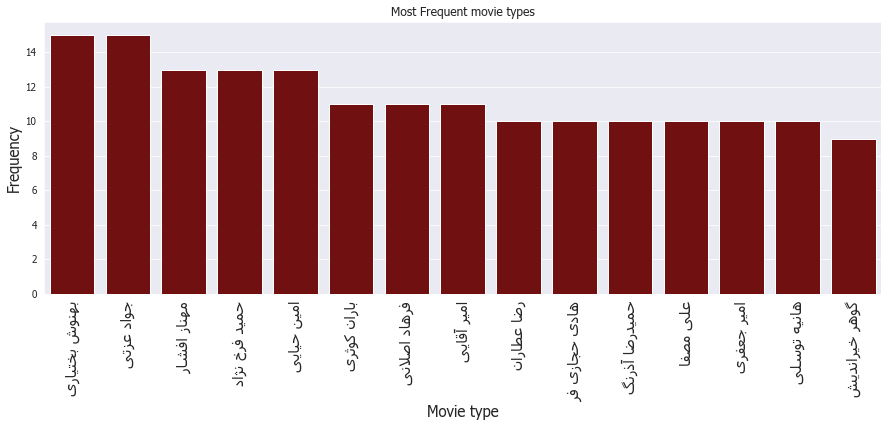

In [709]:
fig = plt.figure(figsize = (15, 5))
sns.barplot(data = a, x = [get_display(reshape(label)) for label in cast_freq.head(15).index],y = cast_freq.head(15)['Frequency'].ravel(),
            color ='maroon')
plt.xticks(rotation='vertical', size = 15)
plt.title('Most Frequent movie types')
plt.xlabel('Movie type',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show()

### Genre

We have to do the same genre, but lets have look on it:

In [710]:
genre1 = pd.get_dummies(data['genre_1'])
genre2 = pd.get_dummies(data['genre_2'])
a = set(genre1.columns)
b = set(genre2.columns)

In [718]:
genre2.sum().sort_values()

اکشن            1
بیوگرافی        1
ورزشی           2
کودک            2
جنگی            3
موزیک           3
ماجراجویی       4
تاریخی          5
جنایی           7
هیجان انگیز     7
خانوادگی        8
فانتزی         12
راز آلود       18
رمانتیک        29
کمدی           47
درام           49
dtype: int64

In [719]:
genre1.sum().sort_values()

موزیکال         1
علمی تخیلی      1
فانتزی          2
اجتماعی         3
ماجراجویی       3
بیوگرافی        3
تاریخی          3
تلویزیونی       4
ترسناک          5
انیمیشن         6
رمانتیک         6
جنگی            9
جنایی          18
اکشن           18
کمدی           25
خانوادگی       30
درام          179
dtype: int64

In [722]:
b-a

{'راز آلود', 'موزیک', 'هیجان انگیز', 'ورزشی', 'کودک'}

As we see, we have موزیک genre in genre2, which in موزیکال  in genre1. also هیجان انگیز in genre2 can be merged to ماجراجویی to increase frequency.

In [731]:
genre1_copy = genre1.copy()

In [737]:
movies = list(genre2[genre2['موزیک']==1].index)
for movie in movies:
    genre1_copy['موزیکال']=np.where(genre1_copy.index==movie,1,genre1_copy['موزیکال'])

In [740]:
movies = list(genre2[genre2['هیجان انگیز']==1].index)
for movie in movies:
    genre1_copy['ماجراجویی']=np.where(genre1_copy.index==movie,1,genre1_copy['ماجراجویی'])

In [742]:
b.discard('هیجان انگیز')
b.discard('موزیک')

In [744]:
for genre in b:
    movies = list(genre2[genre2[genre]==1].index)
    for movie in movies:
        try:
            genre1_copy[genre]=np.where(genre1_copy.index==movie,1,genre1_copy[genre])
        except:
            genre1_copy[genre]=np.where(genre1_copy.index==movie,1,0)

At last, علمی تخیلی just has one frequency and can be merged to فانتزی

In [748]:
genre1_copy['فانتزی']=np.where(genre1_copy['علمی تخیلی']==1,1,genre1_copy['فانتزی'])

In [752]:
genre1_copy.drop('علمی تخیلی', axis = 1,inplace = True)

### Director

Dierector with just 1 frequency, cant help us any more, so lets have look on frequency

In [762]:
a = pd.DataFrame(data.groupby('director')['director'].count().sort_values(ascending = False))
a.rename(columns = {'director':'Frequency'},inplace = True)
a.reset_index(inplace = True)

In [763]:
a

,director,Frequency
0,منوچهر هادی,7
1,آرش معیریان,5
2,مهران مدیری,5
3,مصطفی کیایی,4
4,جواد هاشمی,4
...,...,...
220,سابین ال گمیل,1
221,ساعد سهیلی,1
222,ستاره اسکندری,1
223,ستاره پسیانی,1


And here is the frequency of frequency, here we change 169 director with frequency== سایر and then rempove سایر column in one hot

In [764]:
a.groupby('Frequency')['Frequency'].count()

Frequency
1    169
2     35
3     12
4      6
5      2
7      1
Name: Frequency, dtype: int64

In [765]:
b = a.loc[a.Frequency<2,:]

In [767]:
data_f = data
data_f['director'] = data['director'].replace(list(b['director']),'سایر')

In [774]:
director = pd.get_dummies(data['director'])
director.drop('سایر', axis = 1,inplace = True)

### Movie type 

In [842]:
col = list(data.columns) #because we have انیمیشن in genre and movie type, we change it here avoid confusing
col[7] = 'پویانمایی'
data.columns = col

In [780]:
movie_type = pd.get_dummies(data['movie_type'])

### Story 

We perform NLP on this:

In [782]:
from hazm import *
from parsivar import Normalizer
def persian_normalizer(text):
    normal = Normalizer().normalize(text)
    return normal

def persian_tokenization(text):
    tokens = word_tokenize(text)
    return tokens

stop = pd.read_table('C:\\Users\\MJavad\\Desktop\\persian.txt',encoding = 'utf-8') 
#I downloaded a stopword list from github and store it on my PC
stopwords = stop['li'].to_list()
def remove_persian_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

stemmer = Stemmer()
def stemming_persian(text):
    stem_text = [stemmer.stem(word) for word in text]
    return stem_text

lemmatizer = Lemmatizer()
def lemmatizer_persian(text):
    lemm_text = [lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [783]:
def ready_to_vector(text):
    text_normal = persian_normalizer(text)
    token = persian_tokenization(text_normal)
    no_stopword = remove_persian_stopwords(token)
    stem = stemming_persian(no_stopword)
    lem = lemmatizer_persian(stem)
    return lem

In [787]:
data_f['story'] = data_f['story'].astype('str')
data_f['story_vec'] = data_f['story'].apply(lambda x: ready_to_vector(x))

In [792]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
story_vector = data_f['story_vec'].astype(str)
story_vector = pd.DataFrame(tfidf.fit_transform(story_vector).toarray(),index = list(data.index))

In [801]:
story_vector

,0,1,2,3,4,5,6,7,8,9,...,2655,2656,2657,2658,2659,2660,2661,2662,2663,2664
فیلم ربوده شده Stolen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
فیلم مالیخولیا Melancholy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
فیلم پرسه در حوالی من Wander About Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
فیلم آپاندیس Appendix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
سریال رقص روی شیشه Raghs Rooi e Shisheh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.228062,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
فیلم شب برهنه Shab-e berehne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
فیلم سن پطرزبورگ Saint Petersburg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
فیلم حوض نقاشی The Painting Pool,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
فیلم ماجرای نیمروز Majaray nimroz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Numerical values

In [794]:
num_values = data[['year','time','imdb','imdb_count','critis_rate','like','dislike']]

### Concatenating 

And Now we concatenate all data we stored:

In [798]:
final_data = pd.concat([num_values,movie_type,director,genre1_copy,cast_final,story_vector],axis = 1)

In [799]:
final_data

,year,time,imdb,imdb_count,critis_rate,like,dislike,انیمیشن,برنامه ترکیبی,سریال,...,2655,2656,2657,2658,2659,2660,2661,2662,2663,2664
فیلم ربوده شده Stolen,1395,86,4.4,41.0,45,9,11,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
فیلم مالیخولیا Melancholy,1396,75,3.4,28.0,46,13,15,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
فیلم پرسه در حوالی من Wander About Me,1396,75,5.7,31.0,47,9,10,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
فیلم آپاندیس Appendix,1396,82,5.8,95.0,52,18,16,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
سریال رقص روی شیشه Raghs Rooi e Shisheh,1398,50,4.2,126.0,57,36,27,0,0,1,...,0.0,0.0,0.228062,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
فیلم شب برهنه Shab-e berehne,1380,60,5.0,127.0,89,454,54,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
فیلم سن پطرزبورگ Saint Petersburg,1389,50,6.4,2882.0,89,860,103,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
فیلم حوض نقاشی The Painting Pool,1392,92,7.4,3084.0,90,370,37,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
فیلم ماجرای نیمروز Majaray nimroz,1396,111,6.8,1722.0,90,593,61,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5. Model Training

We know that we have 2 method to build a recommendation system: <b> Collabrative </b> and <b> Content based </b> . In this case, we can perform content based becuase its recommend based on similarity if records, and thats what we want here. if we wanted to recommend based on other users, we should preform collabrative but here we dont have any record related to other users choises

The main way to perform contant based, is cosine similarity and we used it here to find the similarity of records.

In [808]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(final_data)

In [819]:
movie_sim = pd.DataFrame(data = cos_sim,columns = list(final_data.index), index= final_data.index)

In [820]:
movie_sim

,فیلم ربوده شده Stolen,فیلم مالیخولیا Melancholy,فیلم پرسه در حوالی من Wander About Me,فیلم آپاندیس Appendix,سریال رقص روی شیشه Raghs Rooi e Shisheh,فیلم زادبوم Zadboom,فیلم فصل نرگس Fasl-e Narges,فیلم چاقی Obesity,فیلم حراج The Sale,فیلم آشغال های دوست داشتنی Ashghal haye Doost Dashtani,...,فیلم چهار راه استانبول 4 Rah Istanbul,فیلم نهنگ عنبر Sperm Whale,فیلم گشت ارشاد Gasht-e ershad,سریال سال های دور از خانه Salhaye Door Az Khane,فیلم محمد رسول الله Mohammad Rasoolollah,فیلم شب برهنه Shab-e berehne,فیلم سن پطرزبورگ Saint Petersburg,فیلم حوض نقاشی The Painting Pool,فیلم ماجرای نیمروز Majaray nimroz,فیلم ورود آقایان ممنوع Vorood-e-Aghayan Mamnoo
فیلم ربوده شده Stolen,1.000000,0.999915,0.999940,0.999215,0.997557,0.998023,0.998337,0.999422,0.999785,0.909385,...,0.908122,0.387372,0.285991,0.921848,0.201757,0.949688,0.446842,0.437290,0.633244,0.295024
فیلم مالیخولیا Melancholy,0.999915,1.000000,0.999984,0.998828,0.997209,0.997315,0.997713,0.999307,0.999877,0.905573,...,0.905919,0.380416,0.284996,0.922472,0.193096,0.950170,0.439750,0.429273,0.627116,0.286946
فیلم پرسه در حوالی من Wander About Me,0.999940,0.999984,1.000000,0.998910,0.997274,0.997418,0.997839,0.999252,0.999834,0.906372,...,0.905763,0.381184,0.283005,0.921469,0.194736,0.949369,0.440775,0.430879,0.627910,0.288314
فیلم آپاندیس Appendix,0.999215,0.998828,0.998910,1.000000,0.999377,0.999567,0.999791,0.999493,0.998582,0.924888,...,0.921521,0.422453,0.307205,0.926720,0.239818,0.953469,0.481266,0.472053,0.662609,0.332076
سریال رقص روی شیشه Raghs Rooi e Shisheh,0.997557,0.997209,0.997274,0.999377,1.000000,0.999013,0.999359,0.998626,0.996796,0.932949,...,0.930547,0.445240,0.327419,0.932549,0.262428,0.957802,0.503090,0.492324,0.680810,0.354760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
فیلم شب برهنه Shab-e berehne,0.949688,0.950170,0.949369,0.953469,0.957802,0.955036,0.953796,0.958325,0.952309,0.896760,...,0.965222,0.520486,0.561145,0.996811,0.291299,1.000000,0.554349,0.500794,0.722751,0.398734
فیلم سن پطرزبورگ Saint Petersburg,0.446842,0.439750,0.440775,0.481266,0.503090,0.498959,0.496099,0.466829,0.437512,0.768806,...,0.747267,0.995382,0.696936,0.573485,0.956256,0.554349,1.000000,0.987656,0.974423,0.984135
فیلم حوض نقاشی The Painting Pool,0.437290,0.429273,0.430879,0.472053,0.492324,0.489840,0.487579,0.453820,0.425746,0.771053,...,0.708752,0.972560,0.576761,0.509565,0.968727,0.500794,0.987656,1.000000,0.956503,0.983980
فیلم ماجرای نیمروز Majaray nimroz,0.633244,0.627116,0.627910,0.662609,0.680810,0.678032,0.675279,0.651077,0.625692,0.885985,...,0.876166,0.958223,0.696630,0.734444,0.871543,0.722751,0.974423,0.956503,1.000000,0.921131


Now we built the similarity matrix. Here we can pass a genre to system and then select a movie of that genre then system shows us best mathces to iur selection.

To do this, we go to streamlit:

# 6. Building a web application:

<b> Important Note: </b> As you know its impossible to run a streamlit on Jupyter. Also I faced an unusual error and couldn't run it through Pycahran or VSC. For this, I wrote below code on Github repository and connected file of code to <i> share.streamlit.io </i>. But i copied this code here for you to see that.

<b> Now you can examin the final streamlit output by go to this url by turned on VPN: </b>
    
    https://mjavadsharififar-my-codes-streamlit-jrbe09.streamlitapp.com

In [ ]:
import streamlit as st
final = moveis_final

st.title('Welcome to the Movie recommender!')
st.markdown('### Here you can find which movies go with your interests!')
st.text('Please select your favourite genre from below drop down list:') 

genre_list = ['اجتماعی','انیمیشن','اکشن', 'بیوگرافی','تاریخی', 'ترسناک', 'تلویزیونی', 'جنایی'
              , 'جنگی', 'خانوادگی', 'درام', 'رمانتیک', 'فانتزی', 'ماجراجویی', 'موزیکال', 'کمدی', 'کودک', 'راز آلود', 'ورزشی']
genre = st.selectbox("Choose your favorite genre...",['انتخاب کنید'] + genre_list)

if genre == 'انتخاب کنید':
  st.write('You have not selected any genre yet...')
else:
  st.write('so your favorite is {}, Now please select one the movies you have liked from this genre...'.format(genre))
  
  genre_frame = final[final[genre]==1]
  movie = st.selectbox('Select one these movies:',['انتخاب کنید']+list(genre_frame.index))

  try:
    movie_by_genre = movie_sim.loc[list(genre_frame.index),list(genre_frame.index)]
    similar_movies = movie_by_genre[movie].sort_values(ascending = False)
    st.write('According to our Analysis, you might like these movies:')
    if len(similar_movies)>5: #it shows us the 5 best mathc to user selection
        for i in range(1,6):
            st.write(similar_movies.index[i])
    else:
        for i in range (1,len(similar_movies)):
            st.write(similar_movies.index[i])
  except:
    st.write('You have not chosen any movie yet...')

<b> Final Note </b> : Now the task is complete. pls let me now if you have any comment or suggestion about my recommendation system!